<a href="https://www.kaggle.com/code/dascient/sports-bets-winning-algorithm?scriptVersionId=132743154" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Sports Bets Winning Algorithm

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-scores-and-betting-data/nfl_stadiums.csv
/kaggle/input/nfl-scores-and-betting-data/nfl_teams.csv
/kaggle/input/nfl-scores-and-betting-data/spreadspoke_scores.csv
/kaggle/input/nfl-scores-and-betting-data/spreadspoke.R


In [54]:
stadiums = pd.read_csv("/kaggle/input/nfl-scores-and-betting-data/nfl_stadiums.csv",header=0,encoding='unicode_escape')
teams = pd.read_csv("/kaggle/input/nfl-scores-and-betting-data/nfl_teams.csv",header=0)
scores = pd.read_csv("/kaggle/input/nfl-scores-and-betting-data/spreadspoke_scores.csv",header=0)


#stadiums['stadium_weather_station_code'] = stadiums['stadium_weather_station_code'].astype('float')
#stadiums['stadium_capacity'] = stadiums['stadium_capacity'].astype('float')
stadiums['LATITUDE'] = stadiums['LATITUDE'].astype('float')
stadiums['LONGITUDE'] = stadiums['LONGITUDE'].astype('float')
stadiums['ELEVATION'] = stadiums['ELEVATION'].astype('float')


scores['schedule_date'] = scores['schedule_date'].astype('datetime64[ns]')
scores['schedule_season'] = scores['schedule_season'].astype('datetime64[ns]').dt.year
scores['weather_temperature'] = scores['weather_temperature'].astype('float')
scores['score_home'] = scores['score_home'].astype('float')
scores['score_away'] = scores['score_away'].astype('float')
scores['weather_temperature'] = scores['weather_temperature'].astype('float')
scores['weather_wind_mph'] = scores['weather_wind_mph'].astype('float')
scores['weather_humidity'] = scores['weather_humidity'].astype('float')
scores['schedule_season'] = scores['schedule_season'].astype('float')


In [34]:
teams#[teams.team_name == 'Atlanta Falcons']

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [66]:
stadiums

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,USW00094823,"PITTSBURGH ASOS, PA US",40.4846,-80.2144,366.7
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,NaN,NaN,moderate,"75,024",Grass,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor,"285 Dodge Street, Buffalo, NY 14208",14208,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Wembley Stadium,"London, UK",2007.0,NaN,outdoor,"Wembley, London HA9 0WS, United Kingdom","Heathrow, UK",moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,Wrigley Field,"Chicago, IL",1920.0,1970.0,outdoor,"1060 West Addison Street, Chicago, IL 60613",60613,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Yale Bowl,"New Haven, CT",NaN,NaN,outdoor,"276 Derby Ave, West Haven, CT 06516",6516,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN


In [38]:
atlanta = scores[scores.team_home == 'Atlanta Falcons'].sort_values('schedule_date',ascending=False).reset_index(drop=True)
atlanta

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,2023-01-08,2022,18,False,Atlanta Falcons,30.0,17.0,Tampa Bay Buccaneers,ATL,-6.0,40.5,Mercedes-Benz Stadium,False,NaN,NaN,NaN,NaN
1,2023-01-01,2022,17,False,Atlanta Falcons,20.0,19.0,Arizona Cardinals,ATL,-6.5,40.5,Mercedes-Benz Stadium,False,NaN,NaN,NaN,NaN
2,2022-12-04,2022,13,False,Atlanta Falcons,16.0,19.0,Pittsburgh Steelers,PIT,-1.5,43,Mercedes-Benz Stadium,False,NaN,NaN,NaN,NaN
3,2022-11-20,2022,11,False,Atlanta Falcons,27.0,24.0,Chicago Bears,ATL,-2.5,48.5,Mercedes-Benz Stadium,False,NaN,NaN,NaN,NaN
4,2022-11-06,2022,9,False,Atlanta Falcons,17.0,20.0,Los Angeles Chargers,LAC,-2.5,49.5,Mercedes-Benz Stadium,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,1966-11-13,1966,10,False,Atlanta Falcons,7.0,19.0,Baltimore Colts,NaN,NaN,NaN,Atlanta-Fulton County Stadium,False,58.0,12.0,80.0,NaN
445,1966-10-30,1966,8,False,Atlanta Falcons,17.0,49.0,Cleveland Browns,NaN,NaN,NaN,Atlanta-Fulton County Stadium,False,58.0,10.0,62.0,NaN
446,1966-10-16,1966,6,False,Atlanta Falcons,7.0,44.0,San Francisco 49ers,NaN,NaN,NaN,Atlanta-Fulton County Stadium,False,66.0,9.0,76.0,NaN
447,1966-10-02,1966,4,False,Atlanta Falcons,14.0,47.0,Dallas Cowboys,NaN,NaN,NaN,Atlanta-Fulton County Stadium,False,53.0,12.0,63.0,NaN


/tmp/ipykernel_33/1919855074.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = atlanta.corr()


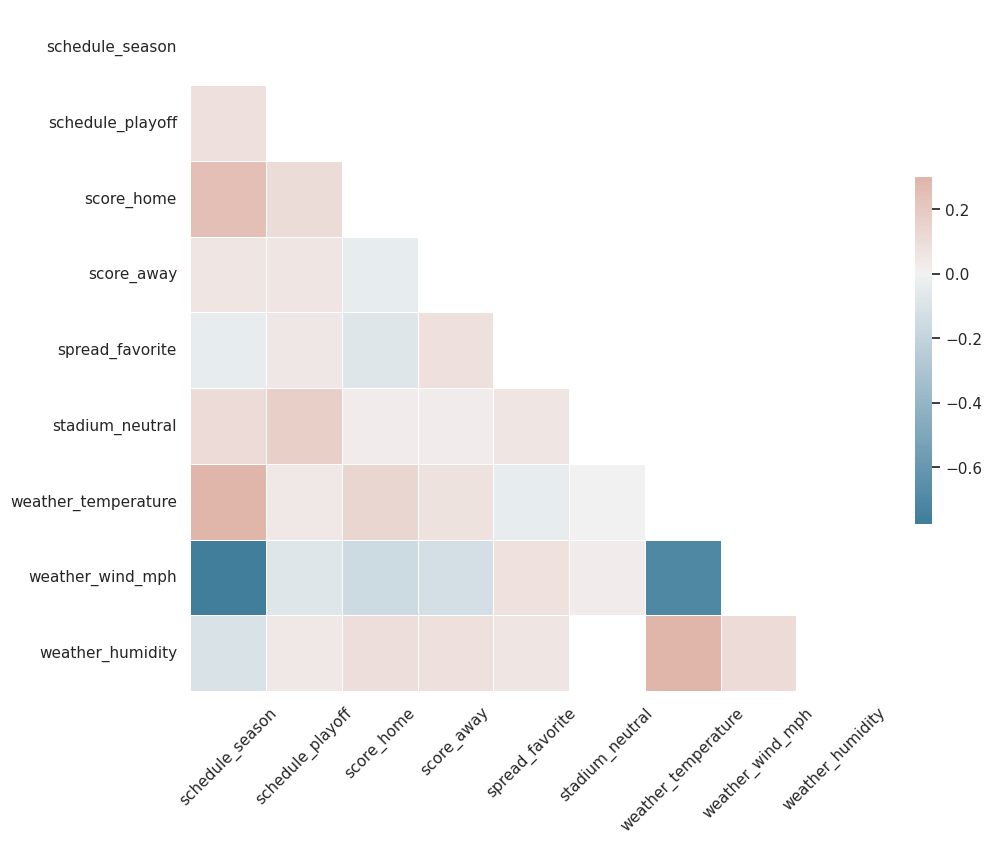

In [69]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = atlanta.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_33/3582992930.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = atlanta_wins.corr()


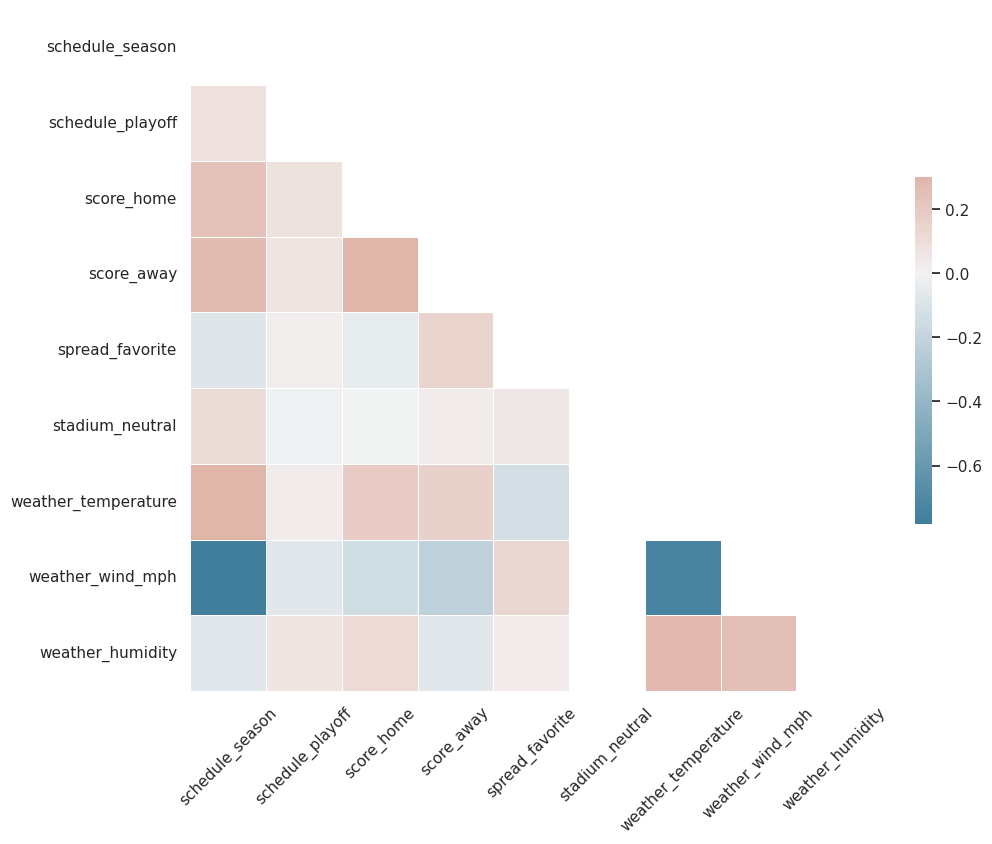

In [70]:
# When do the Falcons win?

atlanta_wins = atlanta[atlanta.score_home > atlanta.score_away]

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = atlanta_wins.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45)
plt.show()
